In [1]:
%matplotlib inline
import numpy as np
from scipy.signal import fftconvolve, firwin, lfilter
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [2]:
audio , sr = librosa.load('./arquivos/teste_de_som.wav')

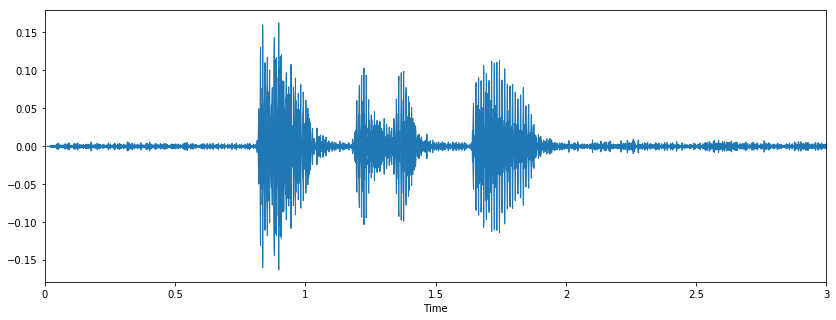

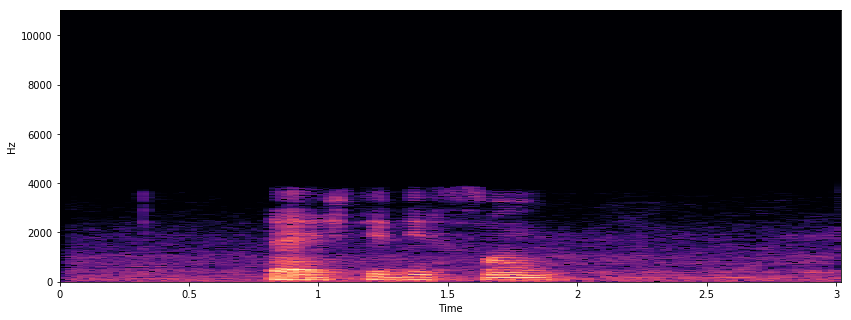

In [3]:
# Visualizando a forma de onda com o eco
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)

# Visualizando o spectro da onda com o eco
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [4]:
ipd.Audio(audio, rate=sr)

In [5]:
audio = audio*30

In [6]:
ipd.Audio(audio, rate=sr)

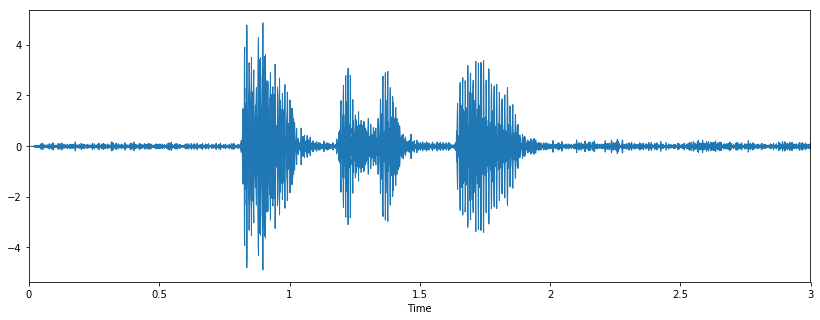

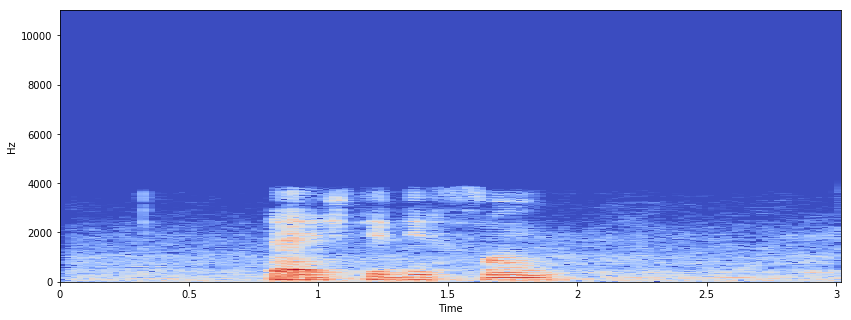

In [7]:
# Visualizando a forma de onda com o eco
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)

# Visualizando o spectro da onda com o eco
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [8]:
# f =  466.16 # Frequencia do ruido

# t = np.arange(len(audio)) # tempo em amostras
# # compute the value (amplitude) of the sin wave at the for each sample
# ruido = np.sin(2*np.pi*f * (t/sr)) 
# ipd.Audio(ruido, rate=sr)

In [9]:
# librosa.output.write_wav('audios_4_2/ruido.wav', ruido, sr)

In [10]:
ruido , _ = librosa.load('./audios_4_2/ruido.wav')# Pra não gerar o mesmo sinal toda vez
ipd.Audio(ruido, rate=sr)

In [11]:
audio_final = audio + ruido

In [12]:
ipd.Audio(audio_final, rate=sr)

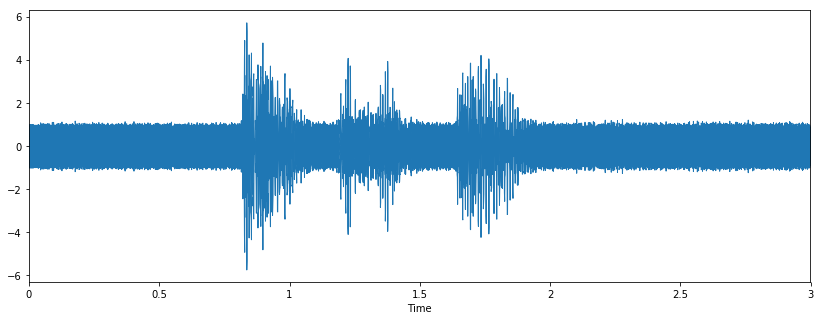

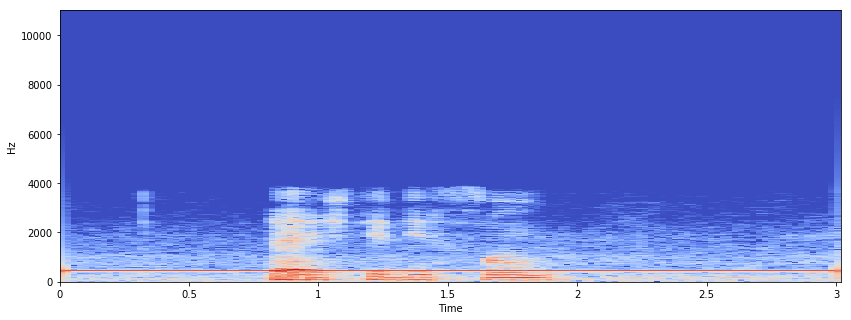

In [13]:
# Visualizando a forma de onda com o eco
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_final, sr=sr)

# Visualizando o spectro da onda com o eco
X = librosa.stft(audio_final)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

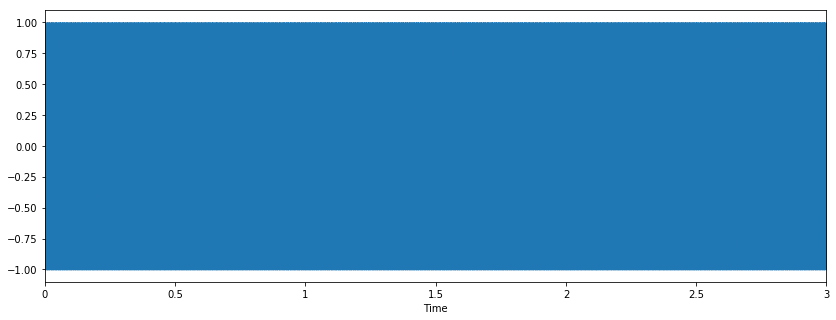

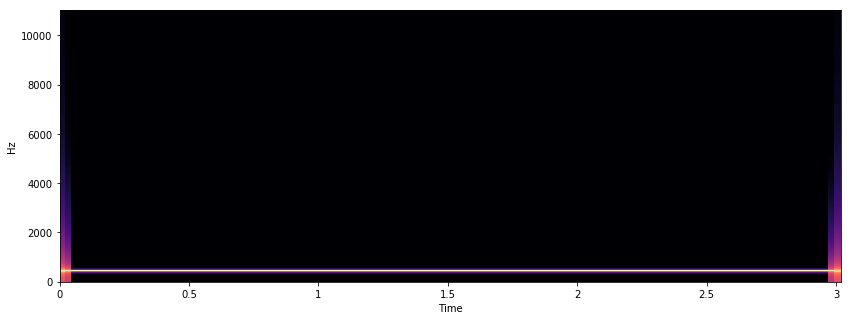

In [14]:
# Visualizando a forma de onda com o eco
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ruido, sr=sr)

# Visualizando o spectro da onda com o eco
X = librosa.stft(ruido)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

### Vou fliltrar o sinal com um filtro butterworth passa banda usando a ideia de telefonias
### pegando a parte mais importante pra compreenção da voz humana entre 4KHz e 8Khz 

https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

https://www.dpamicrophones.com/mic-university/facts-about-speech-intelligibility

In [15]:
lowcut = 2000.0
highcut = 4000.0